For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

# **Step_1 :** Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Step_2:** To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
 <b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
x = np.random.uniform(0, 20, 20)
x

array([13.57876134, 13.710892  ,  8.2101923 , 18.4970553 , 14.70104209,
        4.18990105,  0.96101208,  2.99122867, 11.82681796, 17.70734426,
       12.48462934,  3.71422423,  2.89913048, 18.34097831,  3.03441458,
        7.75295559, 13.11976189,  8.17892998,  8.63046608, 16.86188065])

In [3]:
y = -2*x+1
y

array([-26.15752268, -26.421784  , -15.42038461, -35.99411059,
       -28.40208418,  -7.37980209,  -0.92202416,  -4.98245733,
       -22.65363591, -34.41468852, -23.96925867,  -6.42844846,
        -4.79826097, -35.68195663,  -5.06882915, -14.50591117,
       -25.23952379, -15.35785996, -16.26093217, -32.7237613 ])

Step_3: plot x and y

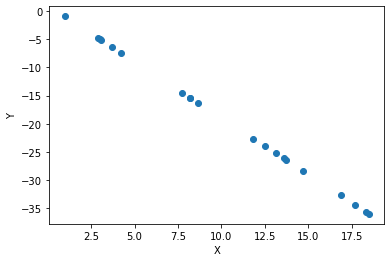

In [4]:
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#### **Step_4:** Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [5]:
def batch_gd1(x,y,a=0.01,iteration = 1000):
    alpha = a
    t0 = 0
    t1 = 0 
    loss_f = []
    t0_list = []
    t1_list = []
    h_list = []
    for i in range(iteration):
        h = t0 + t1 *x
        h_list.append(h)
        cost_f = (sum((h-y)**2)/(2*len(x)))
        loss_f.append(cost_f)
        G0 = 1/len(x) * sum((h-y))
        G1 = sum((h-y)*x)/len(x)
        t0 = t0 - (alpha*G0)
        t0_list.append(t0)
        t1 = t1 - (alpha*G1)
        t1_list.append(t1)
        
    return h,t0,t1,t0_list,t1_list,loss_f,h_list


#### **Step_5:** Try your function with any input parameters of your choice.

In [6]:
h,t0,t1,t0_list,t1_list,loss_f,h_list = batch_gd1(x,y,a=0.01,iteration = 1000)

#### **Step_6:** Calculate r2 score

In [7]:
def R2(y,h):
    ymean = np.mean(y)
    ssres = sum((y-h)**2)
    sstot = sum((y-ymean)**2)
    r2 = 1-(ssres/sstot)
    return r2
R2(y,h)

0.9999782271145498

#### **Step_7:** Plot loss vs. epochs

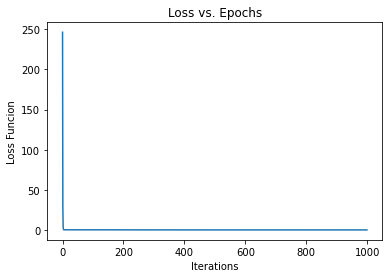

In [8]:
def loss_plot(loss_f): 
    plt.plot(loss_f)
    plt.xlabel("Iterations")
    plt.ylabel("Loss Funcion")
    plt.title("Loss vs. Epochs")
    plt.show()
    
loss_plot(loss_f)

#### **Step_8:** Plot Theta_0 vs. loss and Theta_1 vs. loss

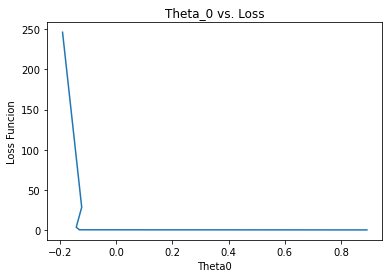

In [9]:
def t0_plot(t0_list,loss_f):    
    plt.plot(t0_list,loss_f)
    plt.xlabel("Theta0")
    plt.ylabel("Loss Funcion")
    plt.title("Theta_0 vs. Loss")
    plt.show()
    
t0_plot(t0_list,loss_f)

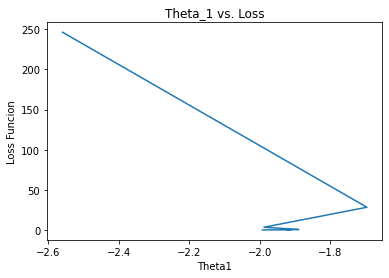

In [10]:
def t1_plot(t1_list,loss_f):
    plt.plot(t1_list,loss_f)
    plt.xlabel("Theta1")
    plt.ylabel("Loss Funcion")
    plt.title("Theta_1 vs. Loss")
    plt.show()
    
t1_plot(t1_list,loss_f)

#### **Step_9:** Plot all regression lines till converge

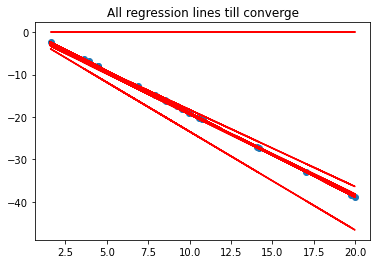

In [62]:
def hlist_plot(x,h_list):    
    plt.scatter(x,y,label='Orignal data')
    for i in range(0,len(h_list)):
        plt.plot(x,h_list[i],color='red',label='Model')
    plt.title("All regression lines till converge")
    plt.show()
    
hlist_plot(x,h_list)

#### **[Step_10:](https://)** Plot the best regression line

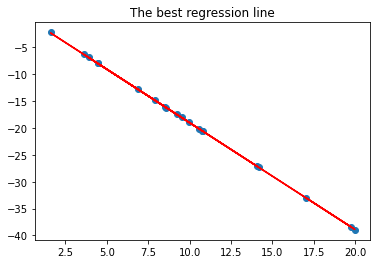

In [63]:
def besth(x,y,h):
    plt.scatter(x,y,label='Orignal data')
    plt.plot(x,h,color='red',label='Model')
    plt.title("The best regression line")
    plt.show()
    
besth(x,y,h)

#### **Step_11:** Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [64]:
h,t0,t1,t0_list,t1_list,loss_f,h_list = batch_gd1(x,y,a=0.01,iteration = 10)

In [65]:
R2(h,y)

0.9970917060562995

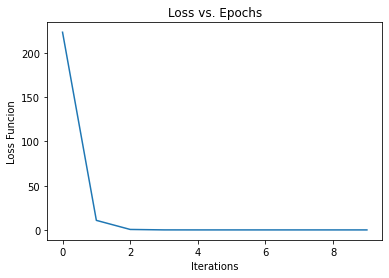

In [66]:
loss_plot(loss_f)

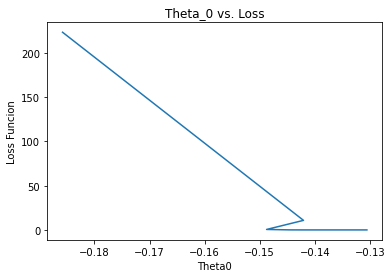

In [67]:
t0_plot(t0_list,loss_f)

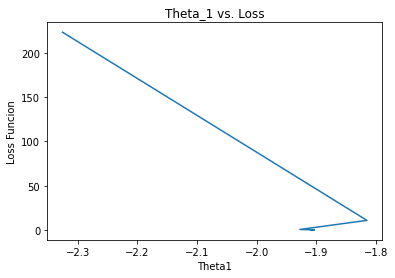

In [68]:
t1_plot(t1_list,loss_f)

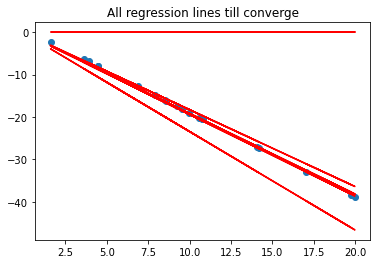

In [69]:
hlist_plot(x,h_list)

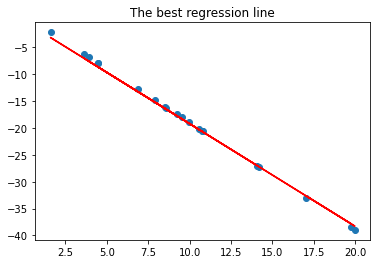

In [70]:
besth(x,y,h)

#### **Step_12:** Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [80]:
def mini_batch_gd1(x,y,b,a=0.01,iteration = 100):
    m = int(len(x)/b)
    alpha = a
    t0 = 0
    t1 = 0 
    loss_f = []
    t0_list = []
    t1_list = []
    h_list = []
    x_list = []
    for i in range(iteration):
        for j in range(m):
            h = t0 + t1 *x[j*b:(j+1)*b]
            h_list.append(h)
            x_list.append(x[j*b:(j+1)*b])
            cost_f = (sum((h-y[j*b:(j+1)*b])**2)/(2*b))
            loss_f.append(cost_f)
            G0 = 1/b * sum((h-y[j*b:(j+1)*b]))
            G1 = sum((h-y[j*b:(j+1)*b])*x[j*b:(j+1)*b])/b
            t0 = t0 - (alpha*G0)
            t0_list.append(t0)
            t1 = t1 - (alpha*G1)
            t1_list.append(t1)
    lh = t0 + t1 *x   
    return lh,t0,t1,t0_list,t1_list,loss_f,h_list,x_list

In [81]:
h,t0,t1,t0_list,t1_list,loss_f,h_list,x_list = mini_batch_gd1(x,y,b=2,a=0.01,iteration = 100)

In [82]:
R2(h,y)

0.9887682652031778

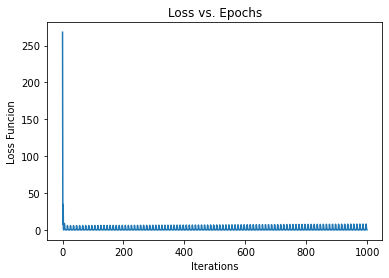

In [83]:
loss_plot(loss_f)

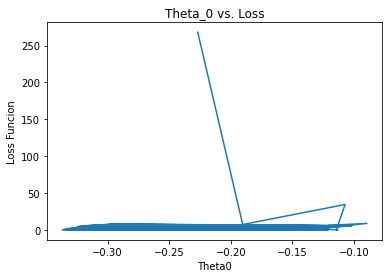

In [84]:
t0_plot(t0_list,loss_f)

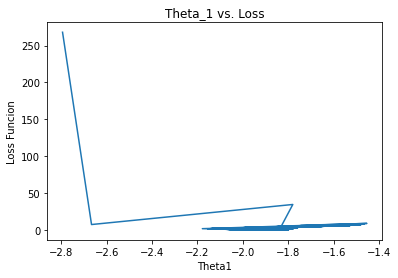

In [85]:
t1_plot(t1_list,loss_f)

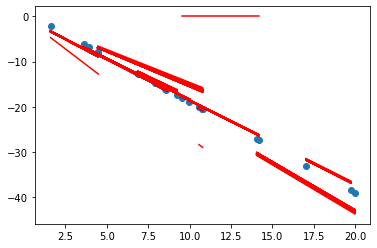

In [86]:
plt.scatter(x,y)
for i in range(0,len(h_list)):
    plt.plot(x_list[i],h_list[i],color='red')
plt.show()

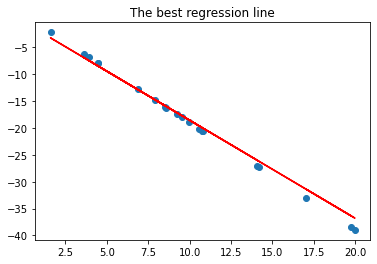

In [87]:
besth(x,y,h)

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [94]:
h,t0,t1,t0_list,t1_list,loss_f,h_list,x_list = mini_batch_gd1(x,y,b=5,a=0.01,iteration = 3)

In [95]:
R2(h,y)

0.9961585631512367

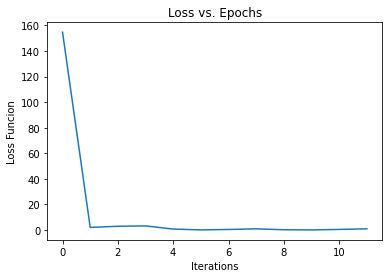

In [96]:
loss_plot(loss_f)

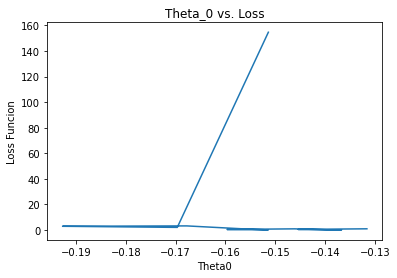

In [97]:
t0_plot(t0_list,loss_f)

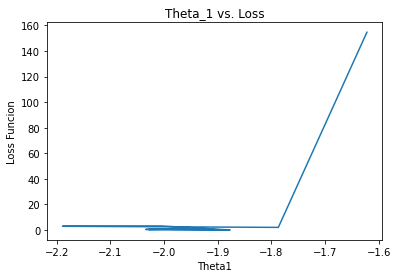

In [98]:
t1_plot(t1_list,loss_f)

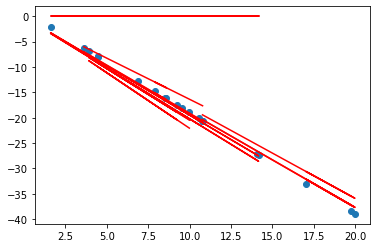

In [99]:
plt.scatter(x,y)
for i in range(0,len(h_list)):
    plt.plot(x_list[i],h_list[i],color='red')
plt.show()

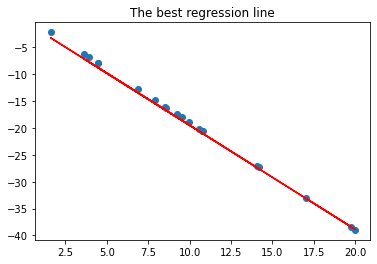

In [100]:
besth(x,y,h)

## Stochastic GD

#### **Step_13**: Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [101]:
def sgd_gd1(x,y,a=0.01,iteration = 100):
    n = len(x)
    alpha = a
    t0 = 0
    t1 = 0 
    loss_f = []
    t0_list = []
    t1_list = []
    h_list = []
    hnew = t0 + t1 *x
    for j in range(iteration):
        h = t0 + t1 *x
        for i in range(n):
            hnew[i] = t0 + t1 *x[i]
            h_list.append(hnew)
            cost_f = ((hnew[i]-y[i])**2)
            loss_f.append(cost_f)
            G0 = (hnew[i]-y[i])
            G1 = (hnew[i]-y[i])*x[i]
            t0 = t0 - (alpha*G0)
            t0_list.append(t0)
            t1 = t1 - (alpha*G1)
            t1_list.append(t1)
        
    return h,t0,t1,t0_list,t1_list,loss_f,h_list


In [102]:
h,t0,t1,t0_list,t1_list,loss_f,h_list = sgd_gd1(x,y,a=0.01,iteration = 100)

In [103]:
R2(y,h)

0.9999995444836111

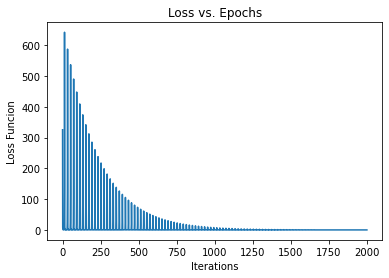

In [104]:
loss_plot(loss_f)

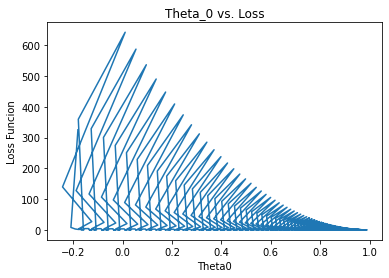

In [105]:
t0_plot(t0_list,loss_f)

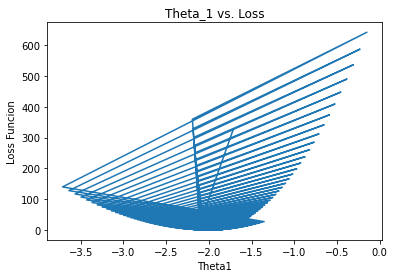

In [106]:
t1_plot(t1_list,loss_f)

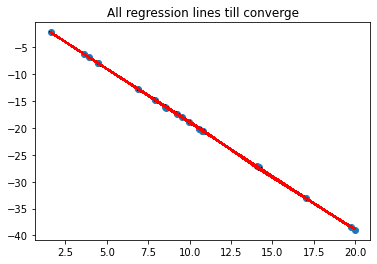

In [107]:
hlist_plot(x,h_list)

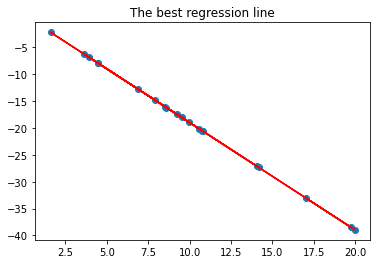

In [108]:
besth(x,y,h)

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

# With Only 2 Iteration

In [109]:
h,t0,t1,t0_list,t1_list,loss_f,h_list = sgd_gd1(x,y,a=0.01,iteration = 2)

In [110]:
R2(h,y)

0.9964150504435488

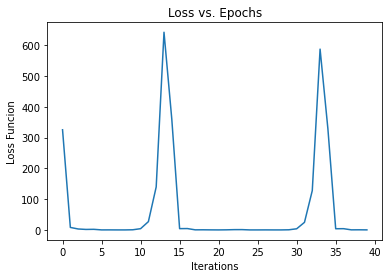

In [111]:
loss_plot(loss_f)

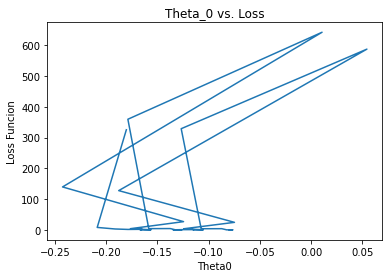

In [112]:
t0_plot(t0_list,loss_f)

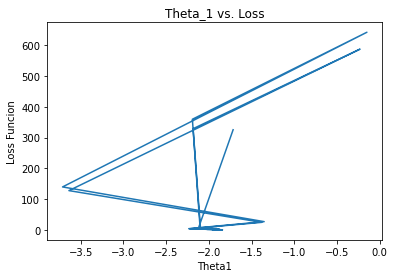

In [113]:
t1_plot(t1_list,loss_f)

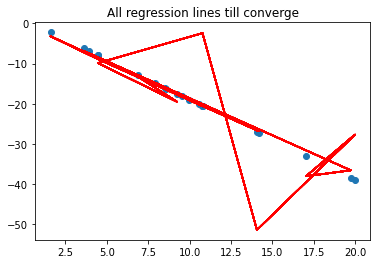

In [114]:
hlist_plot(x,h_list)

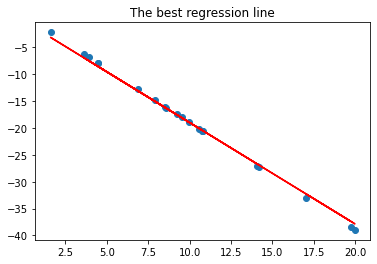

In [115]:
besth(x,y,h)